<a href="https://colab.research.google.com/github/1nisharg/1nisharg/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
print("shape of the data", data.shape)  #299 rows and 13cols.

shape of the data (299, 13)


In [ ]:
print("information of the data :- ")
data.info()

In [ ]:
print("describing the data :- ")
data.describe()

In [ ]:
print("No. of null values :- ")
data.isnull().sum()

#EXPROLATORY DATA ANALYSIS

total no. of living cases :-  203
total no. of died cases :-  96


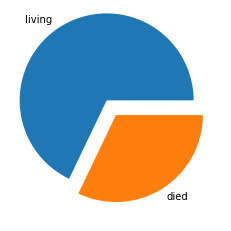

In [21]:
#seeing the distribution of classes, this will help us to identify which types

len_live = len(data["DEATH_EVENT"][data.DEATH_EVENT == 0])
len_death = len(data["DEATH_EVENT"][data.DEATH_EVENT == 1])

arr = np.array([len_live , len_death])
labels = ['living ' , 'died']
print("total no. of living cases :- ", len_live)
print("total no. of died cases :- ", len_death)

plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=False)
plt.show()

# we are actually working on imbalanace data 
# means data is not equally distributed
# balance data means if there are 400 data input then 200 will be living and
# 200 will will be dead.


In [ ]:
#seeing the distribution of age

sns.displot(data["age"])
plt.show()

total no. of living cases :-  20     0
23     0
33     0
38     0
43     0
      ..
292    0
293    0
294    0
295    0
298    0
Name: DEATH_EVENT, Length: 167, dtype: int64
total no. of died cases :-  0      1
1      1
2      1
3      1
4      1
      ..
220    1
230    1
246    1
262    1
266    1
Name: DEATH_EVENT, Length: 85, dtype: int64


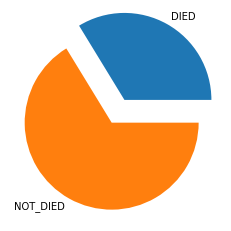

total no. of died cases :-  85
total no. of not died cases :-  167


In [27]:
#selecting rows that are above age 50 and seeing died or not

age_above_50_not_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT ==0]
age_above_50_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT ==1]


len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1 = [len_died, len_not_died]
labels = ['DIED', 'NOT_DIED']
print("total no. of living cases :- ", age_above_50_not_died)
print("total no. of died cases :- ", age_above_50_died)

plt.pie(arr1, labels=labels, explode=[0.2,0.1], shadow=False)
plt.show()

print("total no. of died cases :- ", len_died)
print("total no. of not died cases :- ", len_not_died)



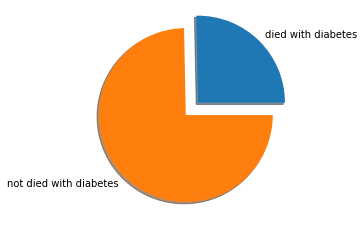

In [29]:
#selecting columns that are having diabetes and seeing died or not

patient_nhave_diabetes_0 = data['DEATH_EVENT'][data.diabetes == 0][data.DEATH_EVENT == 0]
patient_have_diabetes_1 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1)
len_d_alive = len(patient_nhave_diabetes_0)

arr2 = [len_d_died, len_d_alive]
labels = ['died with diabetes', 'not died with diabetes']
plt.pie(arr2, labels=labels, explode = [0.2,0.0], shadow=True)
plt.show()

#output- ppls having diabetes are alive in majority.


In [ ]:
#CHECKING THE COORELATION OF OUR VARIABLE

corr = data.corr() 
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True) 

# interpretation of correlation matrix 

''' 
 - Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. 
 - The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.  
 - A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.  
 - The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables.   
 - The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.
''' 

# references:- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [ ]:
data.corr().style.background_gradient(cmap='coolwarm')

#DATASET DEVELOPMENT

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print("Shape of the X_train", X_train.shape)
print("Shape of the Y_train", y_train.shape)
print("shape of the X_test", X_test.shape)
print("shape of the y_test", y_test.shape)


#MODEL BUILDING

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
def evaluating_model(y_test, y_pred):  
    ''' 
    Function for evaluating our models.
    '''
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print("Precision Score:- ", precision_score(y_test, y_pred)) 
    print("Recall Score:- ", recall_score(y_test, y_pred)) 
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))

In [37]:
# building logistic regression model as a baseline model 

from sklearn.linear_model import LogisticRegression 

lr_clf = LogisticRegression(max_iter=1000) 
lr_clf.fit(X_train, y_train) 

lr_clf_pred = lr_clf.predict(X_test) 

In [ ]:
y_pred = lr_clf.predict(X_test)
evaluating_model(y_test, y_pred)

In [ ]:
# building logistic regression with StandardScaler  

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(), LogisticRegression()) 
lr_clf_pip.fit(X_train, y_train) 

y_pred1 = lr_clf_pip.predict(X_test)
evaluating_model(y_test,y_pred1)